# U ResNet for 5 particle segmentation

In this notebook, I set up and train UResNet for 5 particle classification on the DeepLearnPhysics open data sets.

## Looking at the data

First things first, let's take a look at the data.  We'll use the larcv dataloader2 functionality to open up the data and look at it, similar to [this blog post](http://deeplearnphysics.org/Blog/2018-01-05-TrainingSegmentationData_v0.1.0.html#2018-01-05-TrainingSegmentationData_v0.1.0 "DeepLearnPhysics Blog: Semantic Segmentation")

In [1]:
import ROOT
from larcv import larcv
larcv.ThreadProcessor
from larcv.dataloader2 import larcv_threadio
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os,sys,time

# tensorflow/gpu start-up configuration
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=2
import tensorflow as tf



Welcome to JupyROOT 6.08/06
env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=2


Get an instance of the train data loader to load some images:

In [2]:
# Dump the contents of the config file:
with open('train_io.cfg', 'r') as f:
    s = ""
    for line in f.readlines(): 
        s += line
    print s

TrainIO: {
  Verbosity:       3
  EnableFilter:    false
  RandomAccess:    0
  RandomSeed:      0
  InputFiles:      ["/data/LARTPC_INDP/practice_train_2k.root"]
  ProcessType:     ["MultiPartSegFromCluster2dParticle","BatchFillerImage2D","BatchFillerImage2D"]
  ProcessName:     ["MultiPartSegFromCluster2dParticle","main_data","main_label"]
#  ProcessType:     ["Cluster2DThreshold","BatchFillerImage2D","BatchFillerImage2D"]
#  ProcessName:     ["Cluster2DThreshold","main_data","main_label"]
  NumThreads:      1
  NumBatchStorage: 1

  ProcessList: {
    main_data: {
      Verbosity: 3
      ImageProducer: "data"
      Channels: [0]
    }
    main_label: {
      Verbosity: 3
      ImageProducer: "mcst_multip"
      Channels: [0]
    }
    Cluster2DThreshold: {
      Cluster2DProducer:  "mcst"
      OutputProducer:     "mcst_threshold"
      Threshold:          0.1
    }
    MultiPartSegFromCluster2dParticle: {
      Cluster2dProducer: "mcst"
      OutputProducer:    "mcst_multip"
     

In [3]:
train_io = larcv_threadio()
train_io_cfg = {'filler_name' : 'TrainIO',
                'verbosity'   : 0, 
                'filler_cfg'  : 'train_io.cfg'}
train_io.configure(train_io_cfg)

 setting verbosity 3


For just looking at the data, start the manager with just one event:

In [4]:
train_io.start_manager(1)


Number of particles: 4
ev_image2d size: 3


Fetch some data so we can look at it:

In [5]:
data = train_io.fetch_data('main_data')
label = train_io.fetch_data('main_label')

In [6]:
print "Data dimensions: {}".format(data.dim())
print "Label dimensions: {}".format(label.dim())

Data dimensions: None
Label dimensions: None


Let's visualize these images:

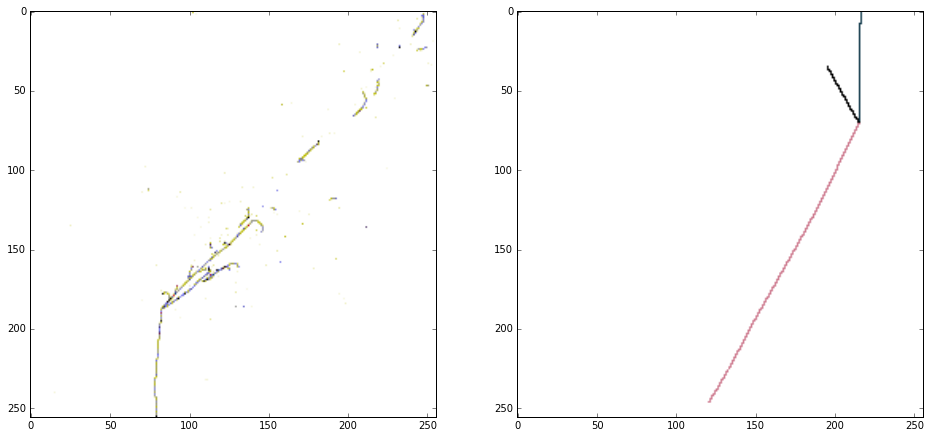

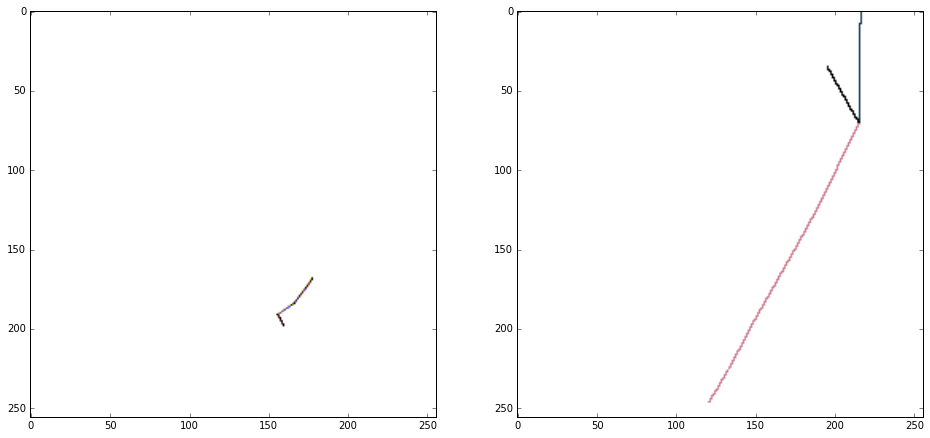

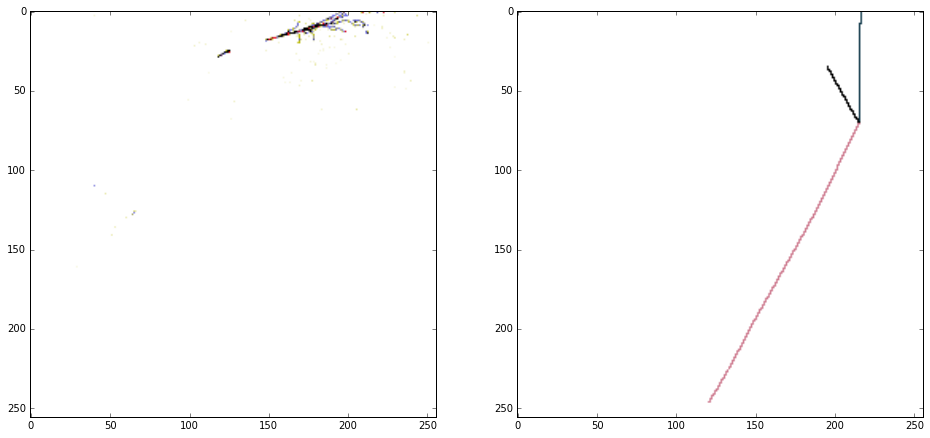

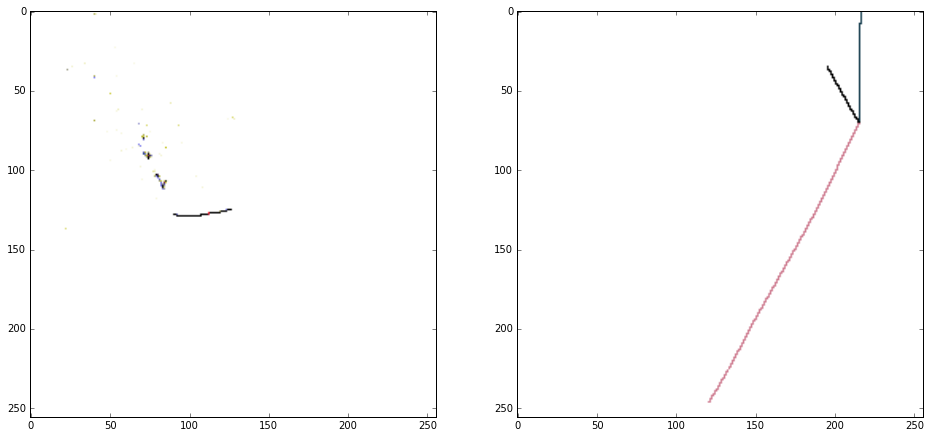

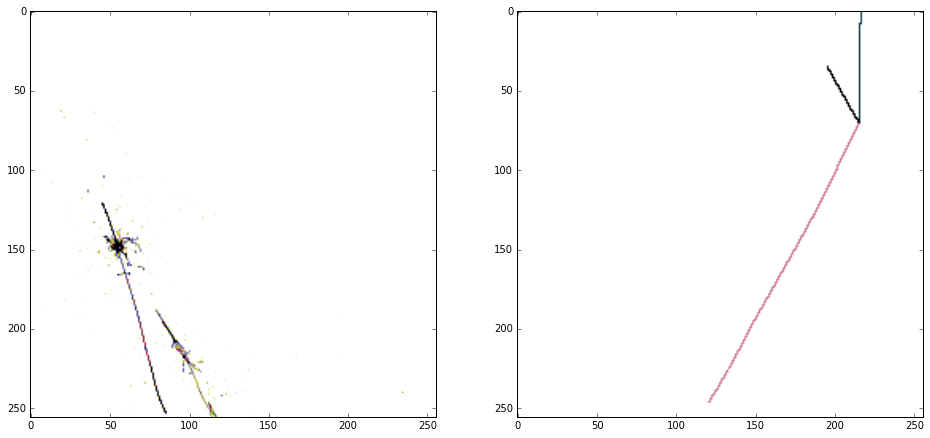

In [9]:
for i in xrange(5):
    # Load new data:
    train_io.next()

    while train_io.is_reading():
        time.sleep(0.1)

    # Fetch the data and reshape it:
    plt_data   = numpy.reshape(train_io.fetch_data("main_data").data(), (256, 256))
    label_arr = numpy.reshape(train_io.fetch_data("main_label").data(), (256, 256))

    f, axarr = plt.subplots(1,2, figsize=(16, 8))
    axarr[0].imshow(plt_data, vmin=0, vmax=300, cmap='gist_stern_r')
    axarr[1].imshow(label_arr,vmin=0, vmax=5, cmap='cubehelix_r')

    plt.show()
